In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sentiment Analysis

Sentiment analysis is an important application of data science. It the process of determining whether a piece of writing is positive, negative or neutral. This can help us deriving the opinion or attitude of the audience regarding business products and services. In this section of the project, we will examine the two most common methods of extracting sentiment from text using NLP.  

    
## Two Main Approaches to Sentiment Analysis:

### Rule-based algorithm

This method is also known as the lexicon-based method where sentiment value is determined by lookup a pre-defined dictionary, assign the corresponding score for each word, and averages all of them together. This specific type of dictionary is called a lexicon. You can take a look at the lexicon for the English language [here](https://github.com/sloria/TextBlob/blob/eb08c120d364e908646731d60b4e4c6c1712ff63/textblob/en/en-sentiment.xml)


### Machine Learning Method

Machine learning allows us to train a model that can predict sentiment based on the frequency of words. If given enough data, this method eliminates the reliant on the existing lexicon and allows us to mine sentiment from any business domain and language.

In [2]:
review = pd.read_csv('review.csv')
review.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,Q1sbwvVQXV2734tPgoKj4Q,hG7b0MtEbXx5QzbzE6C_VA,ujmEBvifdJM6h6RLv4wQIg,1.0,6.0,1.0,0.0,Total bill for this horrible service? Over $8G...,2013-05-07 04:34:36
1,GJXCdrto3ASJOqKeVWPi6Q,yXQM5uF2jS6es16SJzNHfg,NZnhc2sEQy3RmzKTZnqtwQ,5.0,0.0,0.0,0.0,I *adore* Travis at the Hard Rock's new Kelly ...,2017-01-14 21:30:33
2,2TzJjDVDEuAW6MR5Vuc1ug,n6-Gk65cPZL6Uz8qRm3NYw,WTqjgwHlXbSFevF32_DJVw,5.0,3.0,0.0,0.0,I have to say that this office really has it t...,2016-11-09 20:09:03
3,yi0R0Ugj_xUx_Nek0-_Qig,dacAIZ6fTM6mqwW5uxkskg,ikCg8xy5JIg_NGPx-MSIDA,5.0,0.0,0.0,0.0,Went in for a lunch. Steak sandwich was delici...,2018-01-09 20:56:38
4,11a8sVPMUFtaC7_ABRkmtw,ssoyf2_x0EQMed6fgHeMyQ,b1b1eb3uo-w561D0ZfCEiQ,1.0,7.0,0.0,0.0,Today was my second out of three sessions I ha...,2018-01-30 23:07:38


In [3]:
# this dataset is too large for exploratory phase
# a random sample is taken from the original to reduce waiting time
review_sample = review.sample(frac=0.01, random_state=1)
review_sample = review_sample.reset_index(drop=True)

del review

In [4]:
import gc
gc.collect()

0

## Review Exploratory Analysis

#### Check for missing data

In [5]:
review_sample.isna().sum()

review_id      0
user_id        0
business_id    0
stars          0
useful         0
funny          0
cool           0
text           0
date           0
dtype: int64

## Rule-based Algorithm


###  Polarity

Polarity is an approximation of emotions expressed in a given text such as positive, neutral, or negative. TextBlob's implementation of polarity involves the use of lexicon - a vocabulary that contains a number of word-stocks and the associated polarity. 
#### Example:

In [6]:
from textblob import TextBlob

In [7]:
positive_sample = "Everything here is delicious and fresh!"
positive_sample

blob_positive_sample = TextBlob(positive_sample)
print(blob_positive_sample.sentiment.polarity)

0.6875


Let's see how textblob deconstruct the components in the text above:

In [8]:
def polarity(x):
    try:
        blob = TextBlob(x)
        return blob.sentiment.polarity
    except:
        return None

total_polarity = 0
none_zero_polarity_count = 0
for i in positive_sample.split(' '):
    print(i , polarity(i))
    if polarity(i) != 0:
        total_polarity += polarity(i)
        none_zero_polarity_count += 1

Everything 0.0
here 0.0
is 0.0
delicious 1.0
and 0.0
fresh! 0.375


If average the polarity score across the sentence, we receive the final score for the whole sentence:

In [9]:
polarity= total_polarity / none_zero_polarity_count
polarity

0.6875

### Subjectivity

As we can see, the polarity score is just the average polarity of words in the text. Similarly, we can calculate the subjectivity - a measurement that describes people’s feelings towards a specific subject or topic. Subjectivity describes whether a sentence is more factual (0) or more opinionated (1).
For example, we have the following expressions:

* This apple is red.

* This apple tastes amazing.

In [10]:
TextBlob("This apple is red").sentiment.subjectivity

0.0

In [11]:
TextBlob("This apple tastes amazing").sentiment.subjectivity

0.9

While the first expression is objective, the second expression is subjective as it expresses an opinion towards the taste of the apple.

In [12]:
def subjectivity(x):
    try:
        blob = TextBlob(x)
        return blob.sentiment.subjectivity
    except:
        return None

for i in "This apple tastes amazing".split(' '):
    print(i , subjectivity(i))

This 0.0
apple 0.0
tastes 0.0
amazing 0.9


As expected, the adjective "amazing", which contains a strong preference, returns a high subjectivity. On the other hand, an adjective that describes physical attributes such as color "red" returns 0 subjectivity.

Let's apply this algorithm to our reviews dataset:

In [13]:
# convert text column to text
review_sample['text'] = review_sample['text'].astype(str)

In [14]:
review_sample['polarity'] = review_sample['text'].apply(lambda text: TextBlob(text).sentiment.polarity)
review_sample['subjectivity'] = review_sample['text'].apply(lambda text: TextBlob(text).sentiment.subjectivity)
review_sample[['text', 'polarity', 'subjectivity']].head()

,text,polarity,subjectivity
0,"The place was friendly and clean, but the mass...",0.317222,0.497778
1,I have Quick Fix repair numerous phones for ye...,0.271875,0.427778
2,Waited for 1 hour for a table and all these ot...,-0.125000,0.375000
3,Everything is fresh and delicious here. Small ...,0.426250,0.580000
4,"Very bad, super long wait... b/c they pretty m...",0.120667,0.686667


Let's label the polarity into 3 groups: negative, neutral, and positive:

In [15]:
def polarity_classifier(x):
    if x == 0:
        classification = 'neutral'
    elif x > 0:
        classification = 'positive'
    else:
        classification = 'negative'
    return classification

review_sample['polarity_type'] = review_sample['polarity'].apply(polarity_classifier)

review_sample[['text', 'polarity', 'subjectivity', 'polarity_type']].head()

,text,polarity,subjectivity,polarity_type
0,"The place was friendly and clean, but the mass...",0.317222,0.497778,positive
1,I have Quick Fix repair numerous phones for ye...,0.271875,0.427778,positive
2,Waited for 1 hour for a table and all these ot...,-0.125000,0.375000,negative
3,Everything is fresh and delicious here. Small ...,0.426250,0.580000,positive
4,"Very bad, super long wait... b/c they pretty m...",0.120667,0.686667,positive


We can visualize the count for three types of polarity:

Text(0.5, 1.0, 'Polarity Count Plot')

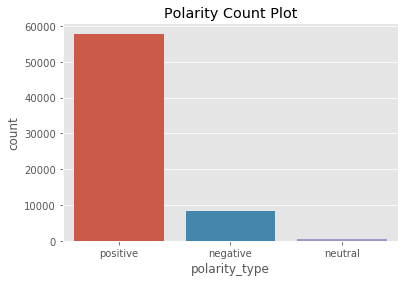

In [16]:
plt.style.use('ggplot')

p = sns.countplot(review_sample['polarity_type'])
p.set_title('Polarity Count Plot')

We can see that majority of reviews are positive. Let's compare the distribution of polarity:

Text(0.5, 1.0, 'Compare Polarity Score between Polarity Types')

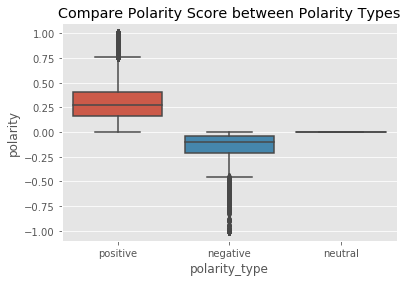

In [17]:
p = sns.boxplot(x = review_sample['polarity_type'], y = review_sample['polarity'])
p.set_title("Compare Polarity Score between Polarity Types")

**Observation**: The negative type is more right-skewed.

Let's check out some of the negative reviews:

In [18]:
review_sample[review_sample['polarity_type'] == 'negative']['text'].iloc[0]

"Waited for 1 hour for a table and all these other tables went in ahead. Hostess wouldn't even give a time frame of when we could get a seat"

In [19]:
review_sample[review_sample['polarity_type'] == 'negative']['text'].iloc[1]

"Got an infection from manicure given by owner..Joanne... very rude person !!!... never going back...and neither will anyone I've shared my story with."

It looks like the algorithm is fairly accurate for these examples.

Let's examine the relationship between polarity and subjectivity:

Text(0, 0.5, '<-- Negative ------- Positive -->')

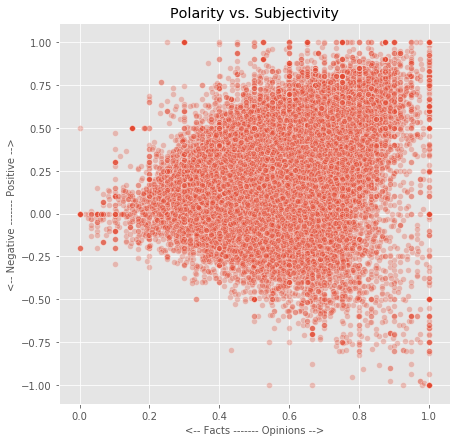

In [20]:
plt.figure(figsize=(7, 7))

p = sns.scatterplot(x = review_sample['subjectivity'], y = review_sample['polarity'], alpha = 0.3)
p.set_title('Polarity vs. Subjectivity')
p.set_xlabel("<-- Facts ------- Opinions -->", fontsize=10)
p.set_ylabel("<-- Negative ------- Positive -->", fontsize=10)

**Observation:** 

1. The majority of reviews are opinionated.

2. Polarity and subjectivity do not seem to correlate. However, we can add stars label to better understand the patterns.


Text(0, 0.5, '<-- Negative ------- Positive -->')

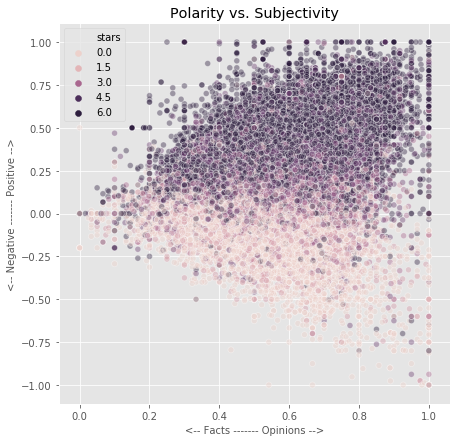

In [21]:
plt.figure(figsize=(7, 7))

p = sns.scatterplot(x = review_sample['subjectivity'], y = review_sample['polarity'], alpha = 0.4, hue=review_sample['stars'])
p.set_title('Polarity vs. Subjectivity')
p.set_xlabel("<-- Facts ------- Opinions -->", fontsize=10)
p.set_ylabel("<-- Negative ------- Positive -->", fontsize=10)

**Interpretation:**

We can observe the linearity in polarity and subjectivity in relation to stars:

1. The more positive and more opinionated sentiment, the higher the stars

2. The more negative and more opinionated sentiment, the lower the stars.


Let's confirm these observations and see if polarity would correlate well with the rating. Since the rating is a discrete variable, it's best to use boxplot to examine the relationship between the number of stars and polarity:

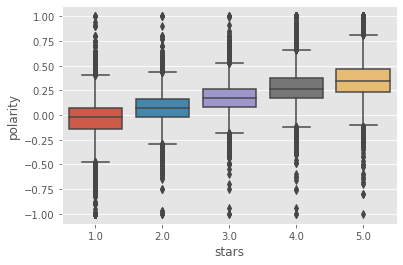

In [22]:
sns.boxplot(x = review_sample['stars'], y = review_sample['polarity'])

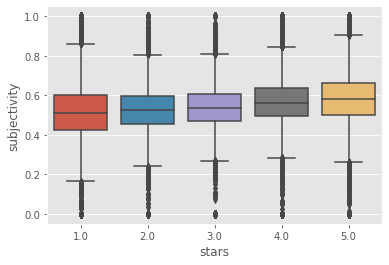

In [23]:
sns.boxplot(x = review_sample['stars'], y = review_sample['subjectivity'])

**Observation**: It appears that the higher the polarity, the higher the average rating. And the same goes for subjectivity and the average rating. Both polarity and subjectivity tend to positively correlate with the number of stars. We will model and examine and model these relationships in the next section.

## Sentiment Mining

### Part-of-Speech

Part-of-Speech (POS) is a tagging method to identify the grammatical group of a given word. Whether it is a NOUN, PRONOUN, ADJECTIVE, VERB, ADVERBS, etc. based on the context. For example:


In [24]:
text = "Waited for 1 hour for a table and all these other tables went in ahead. Hostess wouldn't even give a time frame of when we could get a seat"
text_blob = TextBlob(text)
text_blob.tags

[('Waited', 'VBN'),
 ('for', 'IN'),
 ('1', 'CD'),
 ('hour', 'NN'),
 ('for', 'IN'),
 ('a', 'DT'),
 ('table', 'NN'),
 ('and', 'CC'),
 ('all', 'PDT'),
 ('these', 'DT'),
 ('other', 'JJ'),
 ('tables', 'NNS'),
 ('went', 'VBD'),
 ('in', 'IN'),
 ('ahead', 'RB'),
 ('Hostess', 'NNP'),
 ('would', 'MD'),
 ("n't", 'RB'),
 ('even', 'RB'),
 ('give', 'VB'),
 ('a', 'DT'),
 ('time', 'NN'),
 ('frame', 'NN'),
 ('of', 'IN'),
 ('when', 'WRB'),
 ('we', 'PRP'),
 ('could', 'MD'),
 ('get', 'VB'),
 ('a', 'DT'),
 ('seat', 'NN')]

We can extract the noun in the sentence. 

In [25]:
[word for (word,pos) in text_blob.tags if pos in ['NN', 'NNS']]

['hour', 'table', 'tables', 'time', 'frame', 'seat']

Often, we can find the answer to the question "What do customers care about?" by aggregating all the nouns and select the most frequently occurred items. In the example above, we can quickly see that this particular customer is upset about the seating issue. If many customers do share the same negative sentiment toward an item in their reviews, there is a good chance that items that need improvement. 

#### Noun --> "What?"

Refer to the names of places, things, persons, animals, events.

#### Proper Noun --> "Who?"

It starts with a capital letter and it signifies the names of places, persons and things.

#### Verb --> "Action?"

It refers to the state of being or action of the subject.

#### Adjective --> "How?"

Describes the noun or pronoun in the sentences. It adds more information about the size, quality and number of nouns or pronouns.

Let's process this POS data:

In [26]:
review_sample['noun'] = review_sample['text'].apply(lambda text: ','.join([word for (word,pos) in TextBlob(text).tags if pos in ['NN', 'NNS']]))
# review_sample['proper noun'] = review_sample['text'].apply(lambda text: [word for (word,pos) in TextBlob(text).tags if pos in ['NNP', 'NNPS']])
# review_sample['verb'] = review_sample['text'].apply(lambda text: [word for (word,pos) in TextBlob(text).tags if pos in ['VB', 'VBD', 'VBN', 'VBG', 'VBP']])
# review_sample['adjective'] = review_sample['text'].apply(lambda text: [word for (word,pos) in TextBlob(text).tags if pos in ['JJ', 'RB']])


In [27]:
review_sample['noun']

0               place,massage,oil,massage,arms,hands,knots
1                   repair,phones,years,time,customer,life
2                        hour,table,tables,time,frame,seat
3        Everything,family,restaurant,interiors,times,p...
4        wait,b/c,forgot,minutes,dispatcher,minutes,air...
                               ...                        
66854    family,breakfast,today,service,food,cold,order...
66855    area,years,place,area,kind,food,burgers/wraps,...
66856    regular,location,employees,respect,chat,time,v...
66857    food,sources,apple,butter,biscuit,Place,mix,ma...
66858    Amazing,friends,row,seats,kitchen,chefs,magic,...
Name: noun, Length: 66859, dtype: object

Filter and keep only the positive noun phrases and concat them into a single document:

In [28]:
positive_noun = review_sample[review_sample['polarity_type'] == 'positive']['noun']

flat_positive_noun = ','.join(positive_noun).split(',')

flat_positive_noun[0:10]

['place',
 'massage',
 'oil',
 'massage',
 'arms',
 'hands',
 'knots',
 'repair',
 'phones',
 'years']

Since some nouns are in plural and others are in singular, we need to convert the data to avoid counting the words that have the same meaning. We also need to convert words to lower case to account for noun phrases that appear at the beginning of a sentence.

In [29]:
from textblob import Word

# singularize words and convert to lower case
singularize_positive_noun = [Word(i).singularize().lower() for i in flat_positive_noun]


singularize_positive_noun[0:10]

['place',
 'massage',
 'oil',
 'massage',
 'arm',
 'hand',
 'knot',
 'repair',
 'phone',
 'year']

We can perform the similar task for the negative reviews:

In [30]:
negative_noun = review_sample[review_sample['polarity_type'] == 'negative']['noun']

flat_negative_noun = ','.join(negative_noun).split(',')

singularize_negative_noun = [Word(i).singularize().lower() for i in flat_negative_noun]

Perfect, now we have two lists of words, one for positive sentiment and another for negative sentiment. Let's count the words frequency and visualize the most common word appear in each sentiment:

In [31]:
def word_freq_visualizer(list_of_words, title, color=(0.2, 0.4, 0.6, 0.6)):
    # generate initial key-value pairs for frequency table
    frequency = dict.fromkeys(list_of_words, 0)

    # count the categories
    for i in list_of_words:
        frequency[i] += 1

    # convert dict into dataframe    
    frequency_df = pd.DataFrame({'count':frequency})
    frequency_df.reset_index(level=0, inplace=True)

    # get the top 10 categories
    top10 = frequency_df.sort_values(by = 'count',ascending =False).iloc[:10]
    
    plt.figure(figsize=(7, 8))
    ax = sns.barplot(y = 'index', x = 'count', data = top10, color=color)
    ax.set_ylabel("Word")
    ax.set_title(title)

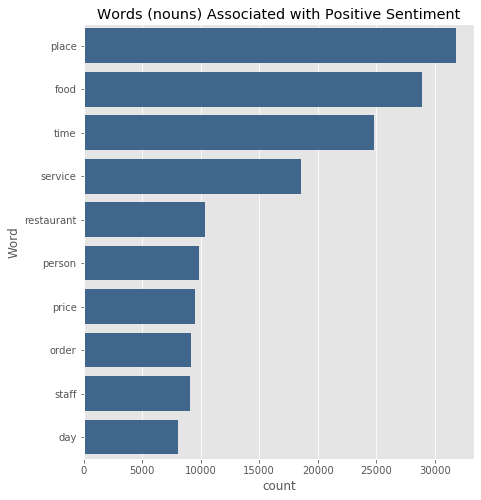

In [32]:
word_freq_visualizer(singularize_positive_noun, "Words (nouns) Associated with Positive Sentiment")

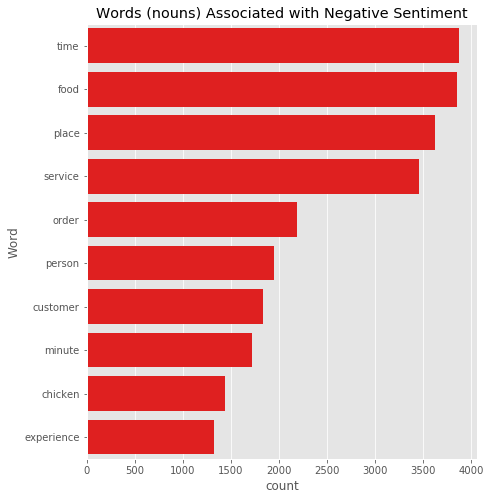

In [33]:
word_freq_visualizer(singularize_negative_noun, "Words (nouns) Associated with Negative Sentiment", color = 'red')

## Sentiment for businesses

### Correlation Between Sentiment and Ratings

Table sentiment_results contain the calculated polarity and subjectivity value for each user review. We will join this table with business.csv to obtain information about the businesses.

In [34]:
sentiment_results = pd.read_csv('sentiment_results.csv')
business = pd.read_csv('business.csv')
business_name = business[['business_id', 'name']]
joined_df = pd.merge(sentiment_results, business_name, on='business_id', how='left')
# remove unuse objects
del sentiment_results
del business

After the sentiement for each user review, we can group them by the business to obtain the average sentiment for each business. 

Text(0.5, 1.0, 'Polarity and Stars')

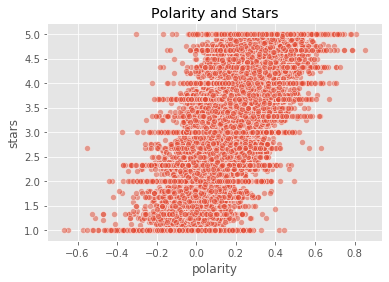

In [35]:
business_agg = joined_df[['name', 'stars','polarity', 'subjectivity']].groupby(['name']).mean()
p = sns.scatterplot(x = business_agg['polarity'],y = business_agg['stars'], alpha = 0.5)
p.set_title('Polarity and Stars')

In [36]:
business_agg['polarity'].corr(business_agg['stars'], method = 'pearson')

0.773886418531062

**Observation:** The high pearson correlation coefficient indicate a strong positive relationship between sentiment and rating.

In [37]:
import statsmodels.api as sm

X = business_agg['polarity']
y = business_agg['stars']

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  stars   R-squared (uncentered):                   0.893
Model:                            OLS   Adj. R-squared (uncentered):              0.893
Method:                 Least Squares   F-statistic:                          1.207e+06
Date:                Tue, 03 Mar 2020   Prob (F-statistic):                        0.00
Time:                        12:15:53   Log-Likelihood:                     -2.3953e+05
No. Observations:              145044   AIC:                                  4.791e+05
Df Residuals:                  145043   BIC:                                  4.791e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
polarity      14.2579      0.013   1098.839      0.000      14.232      14.283
==============================================================================
Omnibus:                     9830.538   Durbin-Watson:                   1.575
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            39340.431
Skew:                           0.233   Prob(JB):                         0.00
Kurtosis:                       5.508   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Interpretation:**

1. The model returns the R-square value of 0.893, meaning  89.3 percent of the variance in the target variable can be explained using linear regression.

2. For the hypothesis test, the polarity has a statistically significant p-value.

3. The coefficient of 14.2579 means that the 1 unit increase in polarity will result in a 14.2579 unit increase in rating.

4. 95% confidence intervals for polarity is between 14.232 and 14.283

Now let's try fitting a regression with more than one variable. This time we will be using both polarity and subjectivity:

In [38]:
X = business_agg[['polarity', 'subjectivity']]
y = business_agg['stars']

model = sm.OLS(y, X).fit()
predictions = model.predict(X) 

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  stars   R-squared (uncentered):                   0.968
Model:                            OLS   Adj. R-squared (uncentered):              0.968
Method:                 Least Squares   F-statistic:                          2.166e+06
Date:                Tue, 03 Mar 2020   Prob (F-statistic):                        0.00
Time:                        12:15:54   Log-Likelihood:                     -1.5272e+05
No. Observations:              145044   AIC:                                  3.054e+05
Df Residuals:                  145042   BIC:                                  3.055e+05
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
polarity         5.9237      0.016    368.683      0.000       5.892       5.955
subjectivity     4.3468      0.008    578.854      0.000       4.332       4.361
==============================================================================
Omnibus:                     4579.500   Durbin-Watson:                   1.874
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9544.980
Skew:                           0.211   Prob(JB):                         0.00
Kurtosis:                       4.184   Cond. No.                         5.70
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Interpretation** We can see here that by adding subjectivity as an independent variable, the regression got a much higher R-squared value of 0.968, meaning 96.8% of the variance can be explained by our regression model. The higher the polarity (more positive) and the subjectivity score, usually the higher the review rating.

### Check Regression Assumptions

**1. Linearity (check for general fitness of linear model)**

**2. Homoscedasticity (check for equality of variance)**

These two assumptions can be verified plotting the residuals vs predictions graph:

Text(0, 0.5, 'residuals')

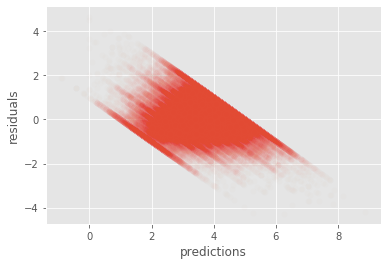

In [39]:
predictions = model.fittedvalues.copy()
true_values = business_agg['stars'].values.copy()
residuals = true_values - predictions

p = sns.scatterplot(predictions, residuals, alpha = 0.01)
p.set_xlabel('predictions')
p.set_ylabel('residuals')

**3. Independence of observations**

Since our observations are roughly independent of one another, we will not have a problem with the correlation of the errors.

**4. Normality of the residual (check for normal distribution of the errors)**

This assumption can be verified using a theoretical quantile of the normal distribution:

((array([-4.42694458, -4.23163568, -4.12552697, ...,  4.12552697,
          4.23163568,  4.42694458]),
  array([-4.27151348, -4.26417213, -4.20677197, ...,  3.99477431,
          4.5       ,  4.66666667])),
 (0.6883820928089045, 0.03427232666075147, 0.993827332780582))

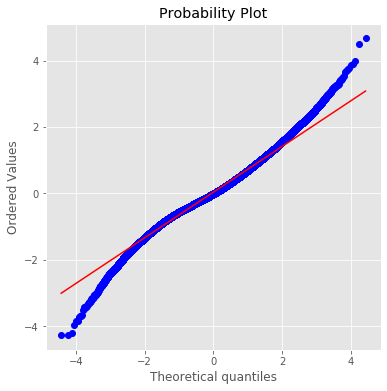

In [40]:
import scipy as sp
fig, ax = plt.subplots(figsize=(6,6))
sp.stats.probplot(residuals, plot=ax, fit=True)

The residuals deviate slightly at the tail ends of the theoretical normal distribution. However, a reasonable good fit indicates that the normality of the residual assumption is met. We can model the relationship between the sentiment of user reviews with the average rating on Yelp using linear regression.

### A case study of Starbucks

In [41]:
joined_df['polarity_type'] = joined_df['polarity'].apply(polarity_classifier)
joined_df.head()

,business_id,stars,date,noun,polarity,subjectivity,name,polarity_type
0,jCNBZnkIFv_0omLVTgNR6Q,5.0,2017-10-11 01:29:49,"place,years,service,view,strip,planes,raves,fo...",0.286111,0.660417,Pure Indian Cuisine,positive
1,9Q1ZtzTPFWG4fJiFSko5Xg,4.0,2011-09-21 16:55:40,"mind,time,eggs,asada,sauce,carne,mouth,flavor,...",0.300000,0.580000,Cantina Laredo,positive
2,oWboXKe_xk6Vcr2gBEuxuw,2.0,2014-05-11 21:46:02,"menu,pastas,marinara,sausage,items,it..",0.089286,0.196429,Pasta and Sugo,positive
3,TgEKtJGC-cN9rrCKgSDx8g,5.0,2017-09-23 22:23:03,"place,cheesecake,cream,employees,job,week,D",0.681250,0.850000,Froggies Snow Cone Shack,positive
4,q7MorRPzU_J-iekeDKUKgw,5.0,2011-02-02 03:21:08,"i,place..,bar,i,place,cocktails,i,tequila,stra...",0.250387,0.483333,Reposado Bar & Lounge,positive


**Let's see what Yelp reviewers think about Starbucks**

In [42]:
starbucks_stars = joined_df[joined_df['name'] == 'Starbucks']['stars'].mean()
starbucks_stars

3.0947436207035337

**Observation:** On average, Starbucks receives 3 stars. Yelp reviewers are tough, but fair. But number of stars alone doesn't tell us much about customer sentiment. 

Let's see how the sentiment changes over time:

In [43]:
import warnings
warnings.filterwarnings('ignore')

# convert date string to datetime
joined_df['date'] = pd.to_datetime(joined_df['date'])

def sentiment_over_time(df = joined_df, business = None, grouping = 'M'):
    aggregate_sentiment = df[df['name'] == business][['date', 'polarity']].set_index('date').groupby(pd.Grouper(freq= grouping)).mean()
    aggregate_sentiment.dropna()
    
    aggregate_stars = df[df['name'] == business][['date', 'stars']].set_index('date').groupby(pd.Grouper(freq= grouping)).mean()
    aggregate_stars.dropna()
    
    plt.figure(figsize=(10, 7))
    
    # plot average sentiemnt on the left axis
    p = sns.lineplot(x = aggregate_sentiment.index, y = aggregate_sentiment['polarity'], label="sentiment")
    
    # plot average star on the right axis
    plt.twinx()
    sns.lineplot(x = aggregate_stars.index, y = aggregate_stars['stars'], color=(0.2, 0.4, 0.6, 0.6),  label="stars")
    p.set_title('{} Average Sentiment'.format(business))
    plt.legend(loc = 'lower right')
        

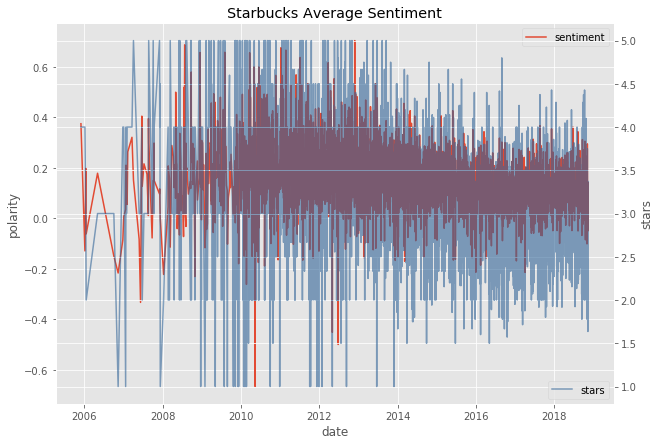

In [44]:
sentiment_over_time(business = 'Starbucks', grouping = 'D')

This graph has too much noise, we can change the grouping to Monthly to smoothout the spikes.

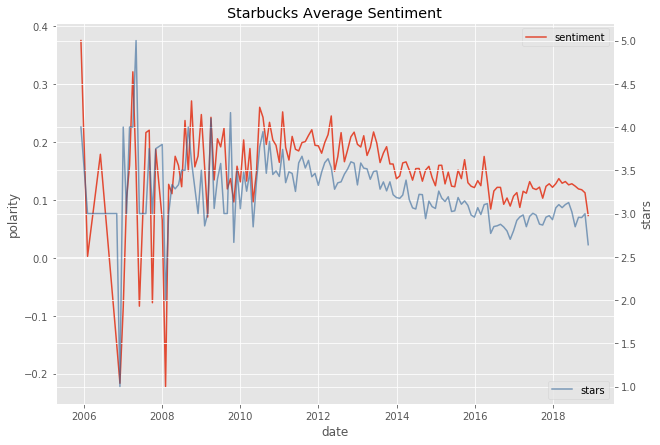

In [45]:
sentiment_over_time(business = 'Starbucks', grouping = 'M')

**Interpretation**: 
1. Both polarity and stars have large variations from 2006-2010. This is most likely due to the sparse number of Yelp reviews taken during this period.

3. Both sentiment and stars share the same trending. Perhaps they may correlate very well with one another.

2. The sentiment gradually decline since the early 2010s.

**What are some of the positive things about Starbucks?**

In [46]:
def text_aggregator(df = joined_df, business = 'Starbucks',sentiment = 'positive'):
    # remove NaNs
    sentiment_filter = df[(df['name'] == business) & (df['polarity_type'] == sentiment)]['noun'].values
    flatten_list = ''.join([x for x in sentiment_filter if str(x) != 'nan']).split(',')
    return [Word(str(i)).singularize().lower() for i in flatten_list]

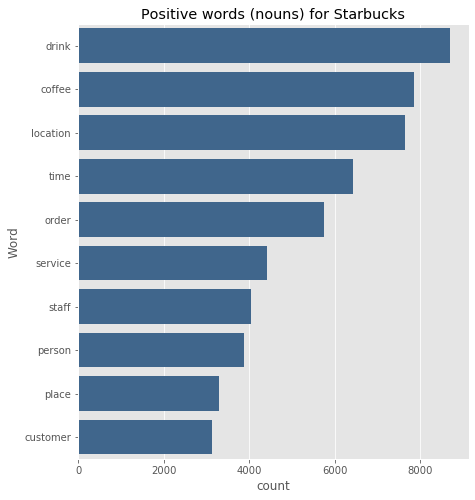

In [47]:
starbucks_positive_nouns = text_aggregator()

word_freq_visualizer(starbucks_positive_nouns, "Positive words (nouns) for Starbucks")

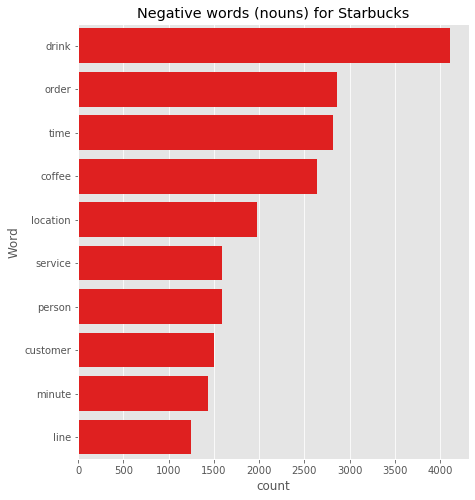

In [48]:
starbucks_negative_nouns = text_aggregator(sentiment = 'negative')

word_freq_visualizer(starbucks_negative_nouns, "Negative words (nouns) for Starbucks", color = 'red')

**Observation:** The drink issue is the number one item among the negative reviews.

## Machine Learning Approach
### Classification Model for Sentiment Analysis of Reviews

Since the raw text cannot be fed directly to the machine learning algorithms, we will need to process the text documents into numerical feature vectors. In this section, we will explore several prominent NLP techniques such as count Vectorizer and Term Frequency-Inverse document Matrix (TF-IDF).

#### Data Preparation

Yelp did not provide the sentiment label for each review. But fortunately, the dataset includes stars rating, which we can use as an approximation for the sentiment. We can define:

1. Stars > 3 --> Positive 

2. Stars < 3 --> Negative

3. Stars == 3 --> Neutral

The neutral ratings are removed to simplify the interpretation and validation process. 

In [49]:
review_sample = review_sample.loc[review_sample['stars'] != 3]
review_sample['Negatively_Rated'] = np.where(review_sample['stars']<3, 1, 0)

**Note**: There is a conscious choice of negative rating as the label for the positive class. We want to select the class that we want to optimize. In our case, correctly identify negative reviews is our main goal.

#### Class Imbalance Problem

Class Imbalance is the problem in machine learning where the total number of a class of data (positive) is far less than the total number of another class of data (negative), this results in a classifier that biases in classifying an individual into the over-represented class.

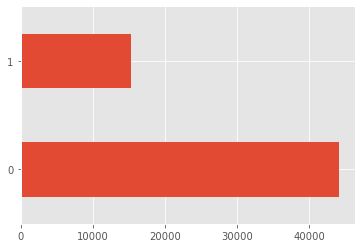

In [50]:
review_sample['Negatively_Rated'].value_counts().plot(kind = 'barh')

#### Lower casing

To avoid counting both upper case and lower case of the same word, we will need to convert all text to lower case:

In [51]:
review_sample['text'] = review_sample['text'].apply(str.lower)
review_sample['text']

0        the place was friendly and clean, but the mass...
1        i have quick fix repair numerous phones for ye...
2        waited for 1 hour for a table and all these ot...
3        everything is fresh and delicious here. small ...
4        very bad, super long wait... b/c they pretty m...
                               ...                        
66854    took the family there for breakfast today and ...
66855    i've been living in the yonge/sheppard area fo...
66856    i'm pretty regular at this chipotle location. ...
66857    great food from local sources. try the apple b...
66858    amazing! my friends and i got front row seats ...
Name: text, Length: 59488, dtype: object

#### Text Normalization with Lemmatization

Lemmatization is the process of normalization of words, which means reducing a word to its root form. Lemmatization is done on the basis of part-of-speech tagging (POS tagging). v stands for verb, a stands for adjective and n stands for noun.


In [52]:
from textblob import Word 

text = """the quicker, brown foxes jumps over the laziest dogs."""

def lemmatization(text):
    lem = []
    for i in text.split():
        word1 = Word(i).lemmatize("n")
        word2 = Word(word1).lemmatize("v")
        word3 = Word(word2).lemmatize("a")
        lem.append(Word(word3).lemmatize())
    return(' '.join(lem))

lemmatization(text)

'the quicker, brown fox jump over the lazy dogs.'

The word "dogs" wasn't lemmatized correctly because of the ending period. To fix this issue, we need to tokenize the sentence break down text into desired pieces of information including punctuations.

In [53]:
from nltk import word_tokenize

def lemmatization(text):
    lem = []
    # implement tokenization
    for i in word_tokenize(text):
        word1 = Word(i).lemmatize("n")
        word2 = Word(word1).lemmatize("v")
        word3 = Word(word2).lemmatize("a")
        lem.append(Word(word3).lemmatize())
    return(' '.join(lem))

lemmatization(text)

'the quick , brown fox jump over the lazy dog .'

In [54]:
# apply lemmatization on column text
review_sample['text'] = review_sample['text'].apply(lemmatization)

####  Removing stop words

Stopwords are the most common words in any natural language. For the purpose of analyzing text data and building NLP models, these stopwords might not add much value to the meaning of the document. We will want to remove these stop words so that more focus can be directed toward words that give meaning to the text.

In [55]:
from nltk.corpus import stopwords

def remove_stopwords(text):
    no_stopwords = []
    for i in word_tokenize(text):
        if i not in stopwords.words('english'):
            no_stopwords.append(i)
    return ' '.join(no_stopwords)
            
remove_stopwords(lemmatization(text))

'quick , brown fox jump lazy dog .'

In [56]:
review_sample['text'] = review_sample['text'].apply(remove_stopwords)

### Cross-validation - Splitting into train and test set

In [57]:
from sklearn.model_selection import train_test_split
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(review_sample['text'], review_sample['Negatively_Rated'], random_state=1)

#### Bag-of-words 

Bag-of-words is a simple and intuitive way of processing text data for machine learning. It uses tokenization to split the documents into tokens and count the number of times a token shows up in each document as a row. Here's an example:

In [58]:
# the function below were obtained from 
# https://towardsdatascience.com/hacking-scikit-learns-vectorizers-9ef26a7170af

from sklearn.feature_extraction.text import CountVectorizer

# create a dataframe from a word matrix
def wm2df(wm, feat_names):
    
    # create an index for each row
    doc_names = ['Doc{:d}'.format(idx) for idx, _ in enumerate(wm)]
    df = pd.DataFrame(data=wm.toarray(), index=doc_names,
                      columns=feat_names)
    return(df)
  
# example text
corpora = ['The quick brown fox.','Jumps over the lazy dog!']

# instantiate the vectorizer object
cvec = CountVectorizer()

# convert the documents into a document-term matrix
wm = cvec.fit_transform(corpora)

# retrieve the terms found in the corpora
tokens = cvec.get_feature_names()

# create a dataframe from the matrix
wm2df(wm, tokens)

,brown,dog,fox,jumps,lazy,over,quick,the
Doc0,1,0,1,0,0,0,1,1
Doc1,0,1,0,1,1,1,0,1


In [59]:
# Fit the CountVectorizer to the training data
vect = CountVectorizer().fit(X_train)

In [60]:
# transform the documents in the training data to a document-term matrix
X_train_vectorized = vect.transform(X_train)

### Logistic Regression Classification Model

I tend to start with a more simple classification model such as logistic regression as a baseline.

In [61]:
from sklearn.linear_model import LogisticRegression,SGDClassifier
model = LogisticRegression(max_iter = 1000)
model.fit(X_train_vectorized, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Model Evaluation:
**AUC score:**

In [62]:
# Create function for ROC plotting
def plot_roc_curve(fpr, tpr, label = None, color = None):
    plt.plot(fpr, tpr, label = label, color = color)
    plt.plot([0,1], [0,1], 'k--') # random predictions curve
    plt.axis([0,1,0,1])
    plt.title('Receiver Operating Characteristic')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")

AUC:  0.908679506760616


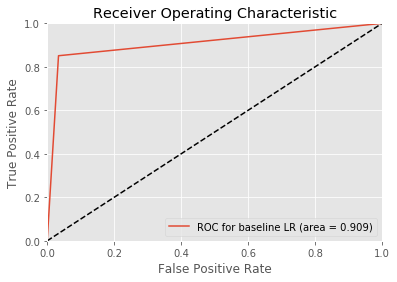

In [63]:
from sklearn.metrics import roc_curve, roc_auc_score, auc, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
predictions = model.predict(vect.transform(X_test))
print('AUC: ', roc_auc_score(y_test, predictions))
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predictions)
baseline_roc_auc = auc(false_positive_rate, true_positive_rate)

# plot the ROC
plot_roc_curve(false_positive_rate,true_positive_rate, label='ROC for baseline LR (area = %0.3f)' % baseline_roc_auc)

**Confusion Matrix**:

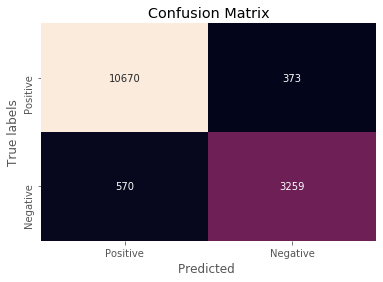

In [64]:
cm = confusion_matrix(y_test, predictions).astype(int)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt= 'g', cbar = False); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted ');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Positive', 'Negative']); ax.yaxis.set_ticklabels(['Positive', 'Negative']);

In [65]:
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
print("accuracy: {} \nprecision: {} \nrecall: {} \nf1-score: {}".format(accuracy,precision, recall, f1))

accuracy: 0.9365922538999462 
precision: 0.8973017621145375 
recall: 0.8511360668581875 
f1-score: 0.8736094357324755


In [66]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96     11043
           1       0.90      0.85      0.87      3829

    accuracy                           0.94     14872
   macro avg       0.92      0.91      0.92     14872
weighted avg       0.94      0.94      0.94     14872



## K-folds Cross validation

In [67]:
from sklearn.model_selection import cross_val_score

X = review_sample['text']
y = review_sample['Negatively_Rated']

vect = CountVectorizer().fit(X)
X_vectorized = vect.transform(X)

# we will use 10 folds cross validation
scores = cross_val_score(LogisticRegression(max_iter = 1000), X_vectorized, y, cv=10, scoring='f1')

In [68]:
scores

array([0.87495854, 0.88514651, 0.87682119, 0.8805574 , 0.89323607,
       0.86927224, 0.87904032, 0.87739335, 0.87533333, 0.87206612])

In [69]:
scores.mean()

0.878382507487208

### Improve upon simple model
#### TF-IDF

TF-IDF stands for “term frequency-inverse document frequency”, meaning the weight assigned to each token not only depends on its frequency in a document but also how recurrent that term is in the entire corpora. This method was proposed to solve the problem where more weight will be under-represent in short documents and over-represent in the large ones.

In [70]:
from sklearn.feature_extraction.text import TfidfVectorizer

# set of documents
corpora = ['The quick brown fox.','Jumps over the lazy dog!']

# instantiate the vectorizer object
cvec = TfidfVectorizer()

# convert the documents into a document-term matrix
wm = cvec.fit_transform(corpora)

# retrieve the terms found in the corpora
tokens = cvec.get_feature_names()

# create a dataframe from the matrix
wm2df(wm, tokens)

,brown,dog,fox,jumps,lazy,over,quick,the
Doc0,0.534046,0.000000,0.534046,0.000000,0.000000,0.000000,0.534046,0.379978
Doc1,0.000000,0.471078,0.000000,0.471078,0.471078,0.471078,0.000000,0.335176


In [71]:
from sklearn.feature_extraction.text import TfidfVectorizer

vect = TfidfVectorizer().fit(X)
X_iftdf_vectorized = vect.transform(X)

scores_iftdf = cross_val_score(LogisticRegression(max_iter = 1000), X_iftdf_vectorized, y, cv=10, scoring='f1')

In [72]:
scores_iftdf.mean()

0.8765195721383929

**Result**: No improvement from TF-IDF matrix transformation.

#### N-gram

N-gram is simply a sequence of N words. This is a useful tool when trying to figure out words and phrases that are used in a language. The longer the n-gram (the higher the n), the more context we have to work with.

For our sentiment learner, we use N-gram to capture the language structure of words that convey emotion when putting  together. 

In [73]:
# instantiate the vectorizer object
cvec = CountVectorizer(ngram_range=(1,2))

# convert the documents into a document-term matrix
wm = cvec.fit_transform(corpora)

# retrieve the terms found in the corpora
tokens = cvec.get_feature_names()

# create a dataframe from the matrix
wm2df(wm, tokens)

,brown,brown fox,dog,fox,jumps,jumps over,lazy,lazy dog,over,over the,quick,quick brown,the,the lazy,the quick
Doc0,1,1,0,1,0,0,0,0,0,0,1,1,1,0,1
Doc1,0,0,1,0,1,1,1,1,1,1,0,0,1,1,0


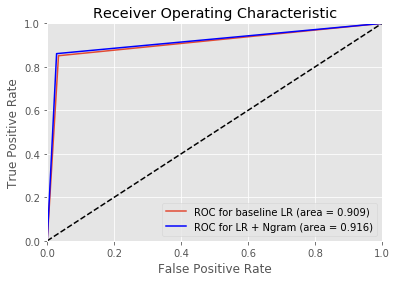

In [74]:
# Fit the CountVectorizer to the training data specifiying a 
# minimum document frequency of 5 and extracting 1-gram and 2-gram
vect = CountVectorizer(min_df=5, ngram_range=(1,2)).fit(X_train)
X_train_vectorized = vect.transform(X_train)

model = LogisticRegression(max_iter = 1000)
model.fit(X_train_vectorized, y_train)
predictions = model.predict(vect.transform(X_test))
fpr_ngram2, tpr_ngram2, thresholds = roc_curve(y_test, predictions)
roc_auc_ngram2 = auc(fpr_ngram2, tpr_ngram2)

plot_roc_curve(false_positive_rate,true_positive_rate, label='ROC for baseline LR (area = %0.3f)' % baseline_roc_auc)
# plt.plot(fpr_tfidf, tpr_tfidf, color = 'green', label = 'ROC for LR + TFIDF (area = %0.3f)' % roc_auc_tf_idf)
plt.plot(fpr_ngram2, tpr_ngram2, color = 'blue', label = 'ROC for LR + Ngram (area = %0.3f)' % roc_auc_ngram2)
plt.legend(loc = 'lower right')

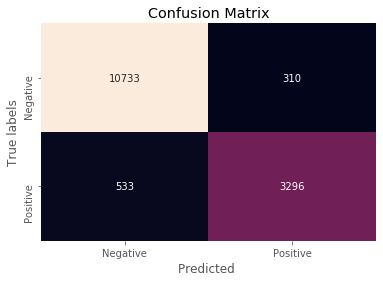

In [75]:
cm = confusion_matrix(y_test, predictions).astype(int)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt= 'g', cbar = False); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted ');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Negative', 'Positive']); ax.yaxis.set_ticklabels(['Negative', 'Positive']);

In [76]:
vect = CountVectorizer(min_df=5, ngram_range=(1,2)).fit(X)
X_vectorized = vect.transform(X)

# we will use 10 folds cross validation
scores_ngram2 = cross_val_score(LogisticRegression(max_iter = 1000), X_vectorized, y, cv=10, scoring='f1')
scores_ngram2.mean()

0.8963350750017322

**Result**: We can see a noticeable improvement in F1 score using bi-gram.  

## Parameters Tuning
### How many N-grams is best?

With the case with Ngrams, features as the combination of words could provides much better result comparing to single words as features. But can we keep increase the combination to obtain better and better result? 

In [77]:
import time
f1s = []
time_elapsed = []

for i in range(1,8):
    start = time.time()
    
    vect = CountVectorizer(min_df=5, ngram_range=(1,i)).fit(X_train)
    X_train_vectorized = vect.transform(X_train)
    model = LogisticRegression(max_iter = 1000)
    model.fit(X_train_vectorized, y_train)
    predictions = model.predict(vect.transform(X_test))
    f1 = f1_score(y_test, predictions)
    
    end = time.time()
    
    f1s.append(f1)
    time_elapsed.append(end - start)


Text(0.5, 1.0, 'Performance Using Different Ngrams')

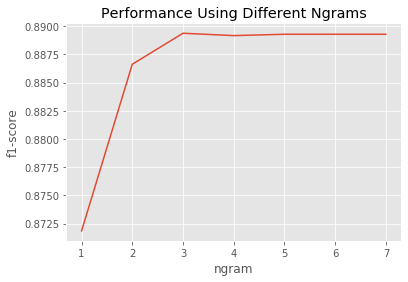

In [78]:
ngrams = pd.DataFrame({'ngram':[1,2,3,4,5,6,7]})
ngrams['f1-score'] = f1s
ngrams['training_time'] = time_elapsed

p = sns.lineplot(x = ngrams['ngram'], y = ngrams['f1-score'])
p.set_title('Performance Using Different Ngrams')

**Observation:** We can gain a little bit more performance from a tri-grams.

#### Which min_df is the best?

The default min_df is 1, which means "ignore terms that appear in less than 1 document". Thus, the default setting does not ignore any terms. We use min_df = 5 to not keeping words that do not occur in at least 5 reviews. This is a method that reduces overfitting by removing the rare words.

In [79]:
import time
f1s = []
time_elapsed = []

for i in range(1,20):
    start = time.time()
    
    vect = CountVectorizer(min_df=i, ngram_range=(1,3)).fit(X_train)
    X_train_vectorized = vect.transform(X_train)
    model = LogisticRegression(max_iter = 1000)
    model.fit(X_train_vectorized, y_train)
    predictions = model.predict(vect.transform(X_test))
    f1 = f1_score(y_test, predictions)
    
    end = time.time()
    
    f1s.append(f1)
    time_elapsed.append(end - start)

,min_df,f1-score,training_time
0,1,0.886048,126.154581
1,2,0.889039,59.637803
2,3,0.889607,49.199096
3,4,0.889068,46.192989
4,5,0.889367,45.301271
5,6,0.889486,44.759831
6,7,0.888590,49.473927
7,8,0.887666,44.816343
8,9,0.887101,42.939667
9,10,0.887133,43.578505


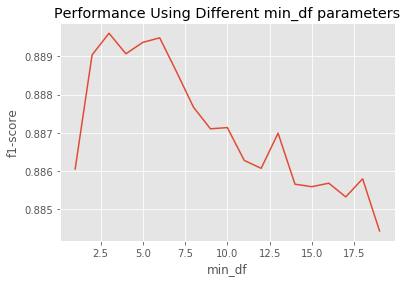

In [80]:
min_df = pd.DataFrame({'min_df':[i for i in range(1,20)]})
min_df['f1-score'] = f1s
min_df['training_time'] = time_elapsed

p = sns.lineplot(x = min_df['min_df'], y = min_df['f1-score'])
p.set_title('Performance Using Different min_df parameters')
min_df

## Try Different Algorithms
#### Random Forest Classifier

In [81]:
from sklearn.ensemble import RandomForestClassifier

vect = CountVectorizer(min_df=5, ngram_range=(1,3)).fit(X)
X_vectorized = vect.transform(X)

# we will use 10 folds cross validation
scores_clf = cross_val_score(RandomForestClassifier(), X_vectorized, y, cv=10, scoring='f1',n_jobs=2)
scores_clf.mean()

0.7452881710932928

#### Support Vector Machine

In [82]:
# since SVC takes a very long time to train, we only use 1 fold validation
from sklearn.svm import SVC
svclassifier = SVC()

vect = CountVectorizer(min_df=3, ngram_range=(1,3)).fit(X_train)
X_train_vectorized = vect.transform(X_train)

svclassifier.fit(X_train_vectorized, y_train)
predictions = svclassifier.predict(vect.transform(X_test))
f1_score(y_test, predictions)

0.856261393913897

**Result:**

Random Forest Classifier scores 0.745

Support Vector Machine Classifier scores 0.85

Both algorithms did not perform as well as logistic regression.

### Support vector machine on TF-IDF:

In [83]:
# from sklearn.svm import SVC
# svclassifier = SVC()

# iftdf_vectorizer = TfidfVectorizer(min_df=5, ngram_range=(1,2)).fit(X_train)
# X_train_vectorized = iftdf_vectorizer.transform(X_train)

# svclassifier.fit(X_train_vectorized, y_train)
# predictions = svclassifier.predict(vect.transform(X_test))
# false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predictions)
# roc_auc = auc(false_positive_rate, true_positive_rate)
# print('AUC: ', roc_auc)

### Demo

Now that we have determined a good set of parameters for our model, let's see it in action:

In [84]:
vect = CountVectorizer(min_df=3, ngram_range=(1,3)).fit(X_train)
X_train_vectorized = vect.transform(X_train)

model = LogisticRegression(max_iter = 1000)
model.fit(X_train_vectorized, y_train)
predictions = model.predict(vect.transform(X_test))

In [90]:
def predict_sentiment(text):
    processed_text = remove_stopwords(lemmatization(text.lower()))

    prediction = model.predict(vect.transform(pd.Series(text)))[0]
    if prediction == 1:
        print('negative')
    else:
        print('positive') 

In [91]:
text= "Very disappointed used to come here quite often as my kids loves their chicken nuggets I went to get  a 20 piece and they weren’t even cooked all the way. So much to where they were soggy. Good thing I checked them before giving them to my kid. When I called the McDonald’s a girl answered Sasha I think was her name. told me what do you want us to do about it after serving me undercooked chicken nuggets. Will not return here horrible customer service and unacceptable quality of food."

In [92]:
predict_sentiment(text)

negative
